<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# 📝 Assignment



## 1.데이터셋 불러오기 연습

다음 url에서 엑셀 파일을 불러오세요. (pandas excel)

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx>

  - 데이터셋 변수의 이름은 `df1`, `df2`로 저장하세요.
  - row가 아닌 column에 '매출액', '영업이익' 이 가도록 데이터를 transpose 하세요.
  - 이후 아래 링크를 참조하여 첫번째 row를 column name으로 설정하세요.

<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

- 파일은 2개의 시트로 구성되어 있으며 각각 이름은 `008770`, `035250` 입니다.



In [24]:
import pandas as pd

data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'

주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%)
2019/09\n(IFRS연결),14753,574,574,376,274,277,-3,37747,28854,8893,8889,4,2000,1652,-284,-900,159,1493,19035,3.89,1.86,13.18,3.62,324.45,395.1,692,31.19,23484,3.67,0,NaN,0
2019/12\n(IFRS연결),15440,776,776,538,380,380,0,35273,26077,9195,9192,4,2000,-480,-208,1230,109,-589,15615,5.03,2.46,20.16,5.81,283.59,411.78,950,21.4,24282,3.74,350,NaN,34.94
2020/03\n(IFRS연결),9437,-668,-668,-925,-736,-736,0,33188,24813,8375,8371,4,2000,-4525,-237,1288,155,-4680,17505,-7.08,-7.8,5.39,1.25,296.28,368.36,-1839,63.76,22114,3.19,NaN,NaN,0
2020/06\n(IFRS연결),5230,-634,-634,-819,-677,-678,1,33039,25364,7676,7671,5,2000,879,-856,448,90,789,18933,-12.13,-12.95,-9.31,-2.14,330.45,334.46,-1695,NaN,20265,3.5,NaN,NaN,0
2020/09\n(IFRS연결),8795,-198,-198,-366,-285,-285,0,32683,25318,7365,7360,5,2000,3104,-1388,-882,129,2975,17755,-2.25,-3.24,-16.22,-3.74,343.77,320.21,-712,NaN,19444,3.91,NaN,NaN,NaN
2020/12(E)\n(IFRS연결),9980,50,NaN,-109,-100,-100,NaN,32388,25171,7216,7263,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,0.5,-1.01,NaN,NaN,348.79,NaN,-251,NaN,19187,4.22,NaN,NaN,NaN
2021/03(E)\n(IFRS연결),9761,144,NaN,14,71,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47,0.73,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN
2021/06(E)\n(IFRS연결),9820,265,NaN,172,214,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,2.18,NaN,NaN,NaN,NaN,308,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# df1 - 008770 
df1 = pd.read_excel(data_url, sheet_name = '008770 ') # 엑셀 파일 불러오기
df1 = df1.transpose() # 행 <-> 열 자리 바꾸기

new_header1 = df1.iloc[0] # 데이터셋의 첫번째 행 가져오기
df1 = df1[1:] # 데이터셋의 2번째 행부터 끝 행까지 가져오기
df1.columns = new_header1 # 가져온 첫번째 행을 헤더로 설정

df1

주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%)
2019/09\n(IFRS연결),14753,574,574,376,274,277,-3,37747,28854,8893,8889,4,2000,1652,-284,-900,159,1493,19035,3.89,1.86,13.18,3.62,324.45,395.1,692,31.19,23484,3.67,0,NaN,0
2019/12\n(IFRS연결),15440,776,776,538,380,380,0,35273,26077,9195,9192,4,2000,-480,-208,1230,109,-589,15615,5.03,2.46,20.16,5.81,283.59,411.78,950,21.4,24282,3.74,350,NaN,34.94
2020/03\n(IFRS연결),9437,-668,-668,-925,-736,-736,0,33188,24813,8375,8371,4,2000,-4525,-237,1288,155,-4680,17505,-7.08,-7.8,5.39,1.25,296.28,368.36,-1839,63.76,22114,3.19,NaN,NaN,0
2020/06\n(IFRS연결),5230,-634,-634,-819,-677,-678,1,33039,25364,7676,7671,5,2000,879,-856,448,90,789,18933,-12.13,-12.95,-9.31,-2.14,330.45,334.46,-1695,NaN,20265,3.5,NaN,NaN,0
2020/09\n(IFRS연결),8795,-198,-198,-366,-285,-285,0,32683,25318,7365,7360,5,2000,3104,-1388,-882,129,2975,17755,-2.25,-3.24,-16.22,-3.74,343.77,320.21,-712,NaN,19444,3.91,NaN,NaN,NaN
2020/12(E)\n(IFRS연결),9980,50,NaN,-109,-100,-100,NaN,32388,25171,7216,7263,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,0.5,-1.01,NaN,NaN,348.79,NaN,-251,NaN,19187,4.22,NaN,NaN,NaN
2021/03(E)\n(IFRS연결),9761,144,NaN,14,71,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47,0.73,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN
2021/06(E)\n(IFRS연결),9820,265,NaN,172,214,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,2.18,NaN,NaN,NaN,NaN,308,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# df2 - 035250
df2 = pd.read_excel(data_url, sheet_name = '035250')
df2 = df2.transpose()

new_header2 = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_header2

df2

주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%)
2019/09\n(IFRS연결),4055,1392,1392,1554,1286,1286,0,41698,4781,36917,36916,NaN,1070,-22,-1260,-4,167,-189,48,34.33,31.72,8.27,7.2,12.95,3513.86,601,21,18209,1.62,0,NaN,0
2019/12\n(IFRS연결),3728,641,641,769,526,526,0,44381,7204,37178,37177,NaN,1070,2067,-2370,-4,383,1684,680,17.18,14.11,9.16,7.72,19.38,3538.24,246,18.92,18337,1.61,900,NaN,346.75
2020/03\n(IFRS연결),2360,-1868,-1868,-2204,-1561,-1561,0,43702,9945,33757,33757,NaN,1070,-684,909,-4,124,-808,651,-79.14,-66.15,2.21,1.75,29.46,3218.48,-730,55.53,16650,1.19,NaN,NaN,NaN
2020/06\n(IFRS연결),346,-1038,-1038,-723,-456,-456,0,39178,5900,33277,33277,1,1070,-3070,5414,-1842,82,-3153,639,-299.75,-131.55,-0.59,-0.5,17.73,3173.64,-213,NaN,16414,1.31,NaN,NaN,0
2020/09\n(IFRS연결),766,-649,-649,-552,-409,-409,0,37434,4560,32875,32874,0,1070,-1584,2327,-4,260,-1844,646,-84.68,-53.33,-5.44,-4.8,13.87,3136,-191,NaN,16215,1.33,NaN,NaN,NaN
2020/12(E)\n(IFRS연결),1581,-434,NaN,-331,-465,-314,NaN,38271,5998,32274,32212,NaN,1070,NaN,NaN,NaN,NaN,NaN,NaN,-27.49,-29.42,NaN,NaN,18.58,NaN,-147,NaN,15888,1.46,NaN,NaN,NaN
2021/03(E)\n(IFRS연결),1473,-187,NaN,NaN,NaN,-33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.7,NaN,NaN,NaN,NaN,NaN,-15,NaN,NaN,NaN,NaN,NaN,NaN
2021/06(E)\n(IFRS연결),1746,-65,NaN,NaN,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.72,NaN,NaN,NaN,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN


## 2. 데이터 확인

- 데이터의 dimension을 확인하세요.
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
  - 0보다 큰 값인 셀 개수의 총합을 `num1`에, 작은 값인 셀 개수의 총합을 `num2`에 저장하세요


(4, 5)

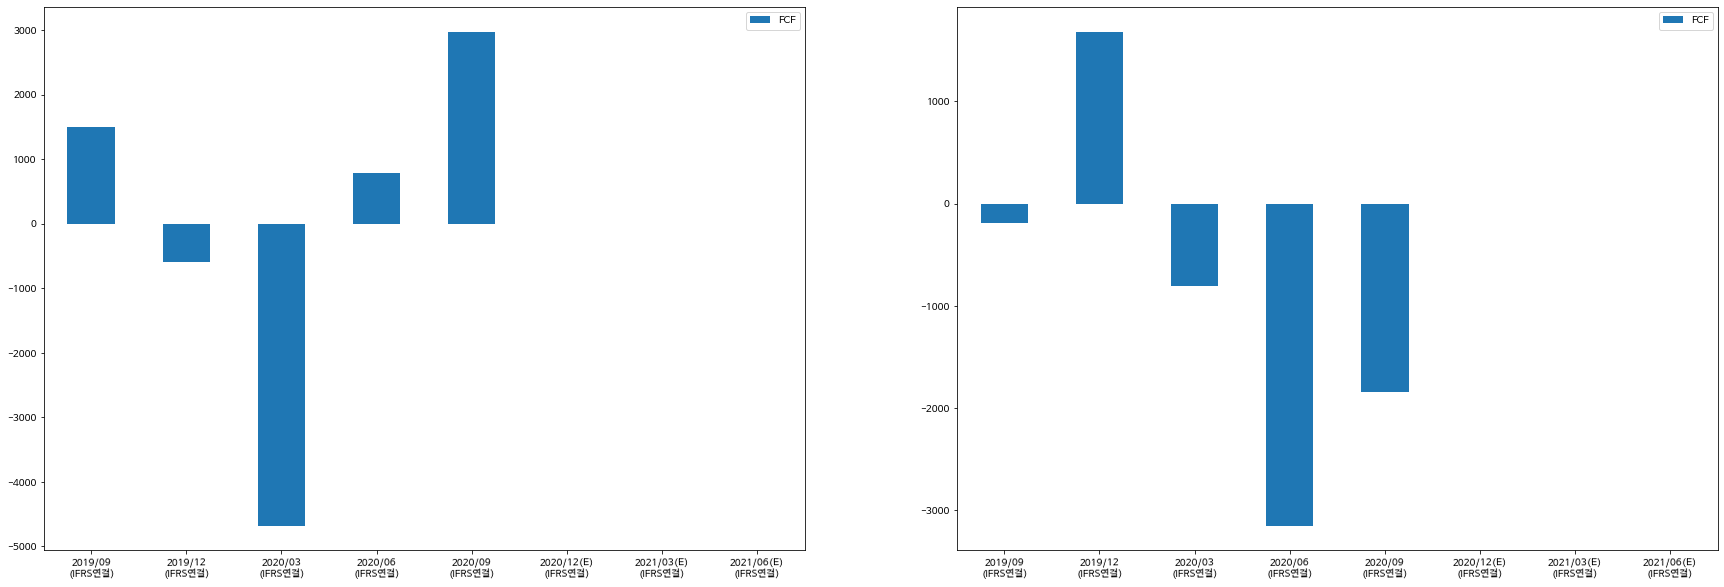

In [23]:
import pandas as pd
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 네이버 나눔 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') # 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 오류 해결

data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'

# 데이터 가져오기 및 행열 바꾸기, 헤더 설정
df1 = pd.read_excel(data_url, sheet_name = '008770 ')
df1 = df1.transpose()

new_header1 = df1.iloc[0]
df1 = df1[1:]
df1.columns = new_header1

df2 = pd.read_excel(data_url, sheet_name = '035250')
df2 = df2.transpose()

new_header2 = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_header2

# 데이터 디멘션 및 결측치 확인, 결측치 0으로 대체
df1.shape
df1.isna()
df1.fillna(0)

df2.shape
df2.isna()
df2.fillna(0)

# df1, df2 각 데이터별 'FCF' 값을 barplot로 시각화
df1_fcf = pd.DataFrame(df1['FCF'], df1.index)
df2_fcf = pd.DataFrame(df2['FCF'], df2.index)

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(30, 10)
df1_fcf.plot(ax=axes[0], kind='bar', rot = 1)
df2_fcf.plot(ax=axes[1], kind='bar', rot = 1)

# df1, df2 각각이 가진 FCF 값들 중 0보다 큰 값(num1)과 작은 값(num2) 개수 총합 구하기
num1 = sum((df1.FCF > 0) | (df2.FCF > 0))
num2 = sum((df1.FCF < 0) | (df2.FCF < 0))
num1, num2


## 3. File export

- 읽었던 엑셀 파일의 내용을 2개의 csv로 각각 출력하세요. (python export csv)

  - 이름은 각각 `df1.csv`, `df2.csv` 입니다.


In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다

## 4. Error Handling

- 다음의 에러를 고치세요. 결과값은 6912가 나와야합니다.


In [ ]:
a = '1234'
b = 5678

a+b

TypeError: ignored

## 5. EDA

아래의 코드는 palmer penguin 데이터를 불러올 수 있는 코드입니다.

```python
import seaborn as sns

pp = sns.load_dataset('penguins')
```

이를 참조하여, `pp`의 `species`와 `sex`변수에 대해서 cross-tabulation을 시행하고, 6개의 값들 중 가장 큰 값을 `num3`에, 가장 작은 값을 `num4`에 저장하세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다

## 🔥 도전과제 

### penguins 데이터를 계속 사용합니다.

이에 대해 아래의 task들을 시행하세요.

- 결측치 처리 (제거)

- bill_length_mm에 대해서 qqplot 그리기

- island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기

- 각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다